In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)



In [2]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
df['quality']=wine.target
df['quality'].value_counts()

quality
1    71
0    59
2    48
Name: count, dtype: int64

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
X = df.drop('quality', axis=1)
y = df['quality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test) 

In [14]:
model=LinearRegression()

In [15]:
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_prediction=model.predict(X_test_scaled)
y_prediction_total=np.round(y_prediction).astype(int)


In [35]:
mse=mean_squared_error(y_test,y_prediction_total)

In [36]:
print(accuracy_score(y_test,y_prediction_total))
print(mse)
print(np.sqrt(mse))

0.9444444444444444
0.05555555555555555
0.23570226039551584


In [43]:
importance_param=pd.Series(model.coef_,index=wine.feature_names)
print(importance_param.abs().sort_values())

magnesium                       0.000551
proanthocyanins                 0.010234
hue                             0.021309
nonflavanoid_phenols            0.040927
malic_acid                      0.049415
ash                             0.057030
alcohol                         0.089306
total_phenols                   0.096726
alcalinity_of_ash               0.151572
color_intensity                 0.178437
od280/od315_of_diluted_wines    0.202596
proline                         0.210057
flavanoids                      0.353594
dtype: float64


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_21244\175849836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_param.abs(),y=importance_param.abs().index,palette='viridis')


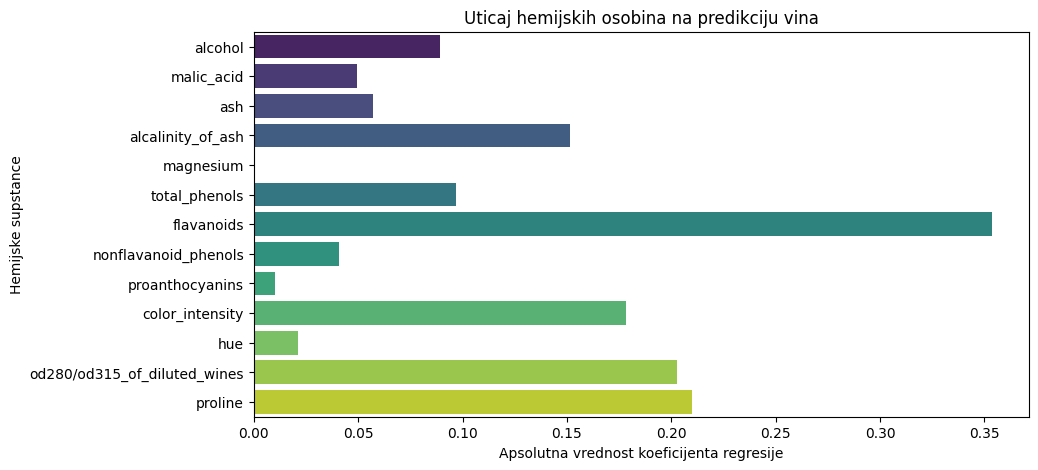

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x=importance_param.abs(),y=importance_param.abs().index,palette='viridis')
plt.title("Uticaj hemijskih osobina na predikciju vina")
plt.xlabel("Apsolutna vrednost koeficijenta regresije")
plt.ylabel("Hemijske supstance")
plt.show()


In [24]:
model2 = GaussianNB()

In [25]:
model2.fit(X_train_scaled,y_train)

,priors,None
,var_smoothing,1e-09


In [38]:
y_prediction2=model2.predict(X_test_scaled)
mse2=mean_squared_error(y_test,y_prediction2)

In [40]:
print(accuracy_score(y_test,y_prediction2))
print(mse2)
print(np.sqrt(mse2))

0.9722222222222222
0.027777777777777776
0.16666666666666666


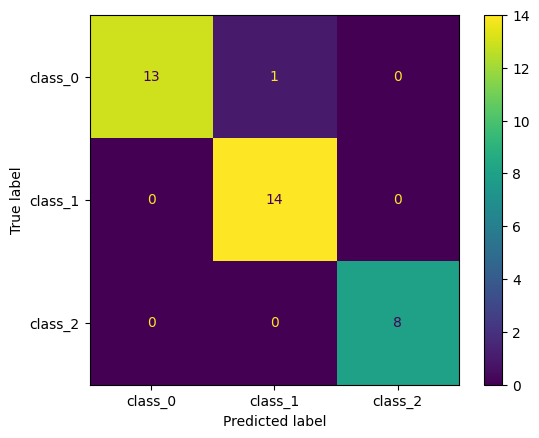

In [58]:
cm=confusion_matrix(y_test,y_prediction2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=wine.target_names)
disp.plot()